In [26]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# for filename matching
import fnmatch
import os


In [2]:

data = pd.read_csv("sc05/highway-ramp_20210730-0142271627623747.747219-0_emission.csv") 
#data = pd.read_csv("sc04/highway-ramp_20210730-0103361627621416.263061-0_emission.csv")


In [3]:
data_new = data[['time','id','x','y','lane_number','leader_id','speed','headway','leader_rel_speed']].copy()
            

In [106]:
print(data['leader_rel_speed'].describe())

count    4.179983e+06
mean     2.381165e+02
std      5.251849e+05
min     -1.037000e+03
25%     -1.672750e-01
50%      3.249862e-02
75%      3.198588e-01
max      1.073741e+09
Name: leader_rel_speed, dtype: float64


In [4]:
data_filtered_0 = data_new[data['time'] > 300].copy()
print(data_filtered_0['leader_rel_speed'].describe())

count    3.314330e+06
mean     3.074251e+02
std      5.897957e+05
min     -1.037000e+03
25%     -1.711030e-01
50%      2.736624e-02
75%      2.920961e-01
max      1.073741e+09
Name: leader_rel_speed, dtype: float64


In [5]:
data_filtered_1 = data_filtered_0.dropna(subset=['time','leader_id']) 
print(data_filtered_1['leader_rel_speed'].describe())

count    3.260472e+06
mean     8.542217e-02
std      1.841176e+00
min     -2.497991e+01
25%     -1.481213e-01
50%      3.211643e-02
75%      3.010169e-01
max      2.828295e+01
Name: leader_rel_speed, dtype: float64


In [6]:
data_filtered_2 = data_filtered_1[data_filtered_1['speed'] >= 0].copy()
print(data_filtered_2['leader_rel_speed'].describe())

count    3.260472e+06
mean     8.542217e-02
std      1.841176e+00
min     -2.497991e+01
25%     -1.481213e-01
50%      3.211643e-02
75%      3.010169e-01
max      2.828295e+01
Name: leader_rel_speed, dtype: float64


In [7]:
print(data_filtered_2['headway'].describe())

count    3.260472e+06
mean     5.478651e+01
std      3.451486e+01
min     -2.405738e+01
25%      2.695478e+01
50%      5.774311e+01
75%      7.201750e+01
max      6.995301e+02
Name: headway, dtype: float64


In [9]:
data_filtered_3 = data_filtered_2[data_filtered_2['headway'] >= 0].copy()
print(data_filtered_3['headway'].describe())

count    3.258975e+06
mean     5.481674e+01
std      3.449360e+01
min      2.086616e-02
25%      2.697606e+01
50%      5.775467e+01
75%      7.202829e+01
max      6.995301e+02
Name: headway, dtype: float64


In [129]:
data = pd.read_csv("/home/cwang717/git/flow/output/crystal_v2/sc00/highway-ramp_20210731-0030291627705829.1651113-0_emission.csv")

#data = pd.read_csv("/home/cwang717/git/flow/output/crystal_v2/sc01/highway-ramp_20210731-0018081627705088.8598025-0_emission.csv")

#data = pd.read_csv("/home/cwang717/git/flow/output/crystal_v2/sc02/highway-ramp_20210731-0103101627707790.992197-0_emission.csv")

data_new = data[['time','id','x','y','lane_number','leader_id','speed','headway','leader_rel_speed']].copy()
            # print(data.describe())
            # print(data.head(5))
data_filtered_0 = data_new[data['time'] > 300].copy() #steady state
data_filtered_2 = data_filtered_0[data_filtered_0['speed'] >= 0].copy()
print(data_filtered_2.describe())
data_filtered_1 = data_filtered_2[data_filtered_2['headway'] >= 0].copy() # hard to fix in simulation


               time             x             y   lane_number         speed  \
count  3.404891e+06  3.404891e+06  3.404891e+06  3.404891e+06  3.404891e+06   
mean   6.133933e+02  3.753097e+03  2.040202e+02  1.487301e+00  2.065269e+01   
std    1.712060e+02  2.318159e+03  1.572124e+01  1.120028e+00  5.222429e+00   
min    3.001000e+02  4.867440e+00 -1.060267e+00  0.000000e+00  0.000000e+00   
25%    4.675000e+02  1.712424e+03  2.009300e+02  0.000000e+00  1.955164e+01   
50%    6.190000e+02  3.712957e+03  2.073300e+02  2.000000e+00  2.175208e+01   
75%    7.623000e+02  5.631986e+03  2.073300e+02  2.000000e+00  2.383798e+01   
max    9.000000e+02  7.999902e+03  2.105300e+02  3.000000e+00  3.100000e+01   

            headway  leader_rel_speed  
count  3.404891e+06      3.404891e+06  
mean   6.832584e+01     -1.636122e+01  
std    1.225791e+02      1.286375e+02  
min   -2.922034e+01     -1.032000e+03  
25%    4.102483e+01     -8.310099e-02  
50%    5.001252e+01      7.538286e-02  
75%    6

In [ ]:
follower_str = data_filtered_1.loc[:,'id'].str[8:19].copy()
data_filtered_1.loc[:,'follower_type'] = ['HDV' if 'hum' in x else 'CAV' for x in follower_str]
data_filtered_1.follower_type.describe()

data_filtered_1['lane_number_next'] = data_filtered_1['lane_number'].shift(-1) #next row
data_filtered_1['id_next'] = data_filtered_1['id'].shift(-1)


data_filtered.1oc[(data_filtered['lc'] == 'HDV') & (data_filtered['TTC'] < 2), 'conflict'] = 1
data_filtered.loc[(data_filtered['lc'] == 'HDV') & (data_filtered['TTC'] >= 2), 'conflict'] = 0

In [130]:
data_leftlane = data_filtered_1[data_filtered_1['lane_number'] == 3].copy()
print(data_leftlane.describe())

                time              x             y  lane_number          speed  \
count  830395.000000  830395.000000  8.303950e+05     830395.0  830395.000000   
mean      609.754692    3637.744946  2.105300e+02          3.0      23.056599   
std       169.698198    2309.904109  5.684345e-14          0.0       2.674400   
min       300.100000       4.867440  2.105300e+02          3.0       0.000000   
25%       466.400000    1582.971373  2.105300e+02          3.0      20.758664   
50%       613.600000    3475.669611  2.105300e+02          3.0      23.491363   
75%       754.800000    5573.817990  2.105300e+02          3.0      24.850540   
max       900.000000    7999.896663  2.105300e+02          3.0      31.000000   

             headway  leader_rel_speed  
count  830395.000000     830395.000000  
mean       60.662717         -7.511847  
std        82.804585         88.142881  
min         2.783669      -1032.000000  
25%        44.849470         -0.001220  
50%        50.229267    

In [132]:
follower_str = data_leftlane.loc[:,'id'].str[8:19].copy()
data_leftlane.loc[:,'follower_type'] = ['HDV' if 'hum' in x else 'CAV' for x in follower_str]
data_leftlane.follower_type.describe()
            

count     830395
unique         2
top          CAV
freq      445593
Name: follower_type, dtype: object

In [134]:
print(data_leftlane['speed'].describe())

count    830395.000000
mean         23.056599
std           2.674400
min           0.000000
25%          20.758664
50%          23.491363
75%          24.850540
max          31.000000
Name: speed, dtype: float64


In [133]:
speed_by_type = data_leftlane.groupby(['follower_type'])[["speed"]].describe()
print(speed_by_type)

                  speed                                                       \
                  count       mean       std       min        25%        50%   
follower_type                                                                  
CAV            445593.0  23.187319  2.583099  0.000000  20.915142  23.567312   
HDV            384802.0  22.905228  2.768679  0.284523  20.592592  23.363250   

                                
                     75%   max  
follower_type                   
CAV            24.924465  31.0  
HDV            24.732448  31.0  


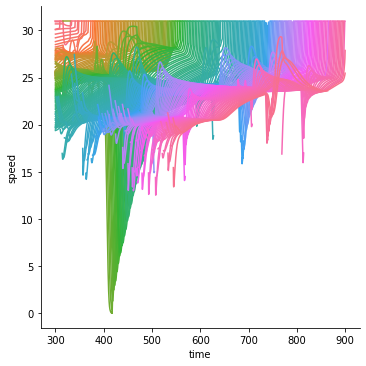

In [116]:
data_plot = data_leftlane.iloc[0:576000,:]
plt = sns.relplot(
    data=data_plot, kind="line",
    x="time", y="speed", 
    hue="id", 
    facet_kws=dict(sharex=False),
    legend = False
)

plt.savefig('sc00_leftlane_speed')

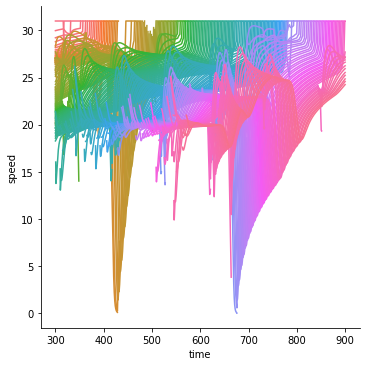

In [120]:
data_plot = data_leftlane.iloc[0:576000,:]
plt = sns.relplot(
    data=data_plot, kind="line",
    x="time", y="speed", 
    hue="id", 
    facet_kws=dict(sharex=False),
    legend = False
)

plt.savefig('sc01_leftlane_speed')

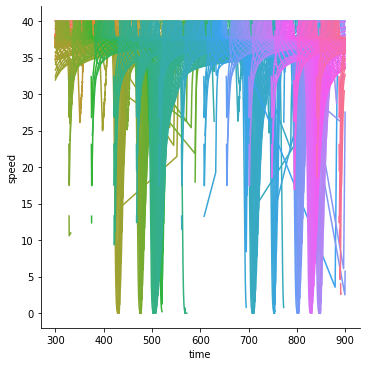

In [113]:
data_plot = data_leftlane.iloc[0:576000,:]
plt = sns.relplot(
    data=data_plot, kind="line",
    x="time", y="speed", 
    hue="id", 
    facet_kws=dict(sharex=False),
    legend = False
)

plt.savefig('sc02_leftlane_speed')

In [111]:
print(data_filtered_3['leader_rel_speed'].describe())

count    3.258975e+06
mean     8.333557e-02
std      1.837610e+00
min     -2.497991e+01
25%     -1.482781e-01
50%      3.202483e-02
75%      3.004362e-01
max      2.828295e+01
Name: leader_rel_speed, dtype: float64


In [112]:
data_filtered = data_filtered_3[data_filtered_3['leader_rel_speed'] < 0].copy()
print(data_filtered['leader_rel_speed'].describe())

count    1.409713e+06
mean    -8.714488e-01
std      1.735075e+00
min     -2.497991e+01
25%     -8.505013e-01
50%     -2.170453e-01
75%     -5.509140e-02
max     -1.757337e-08
Name: leader_rel_speed, dtype: float64


In [113]:
print(data_filtered_3.shape[0])
print(data_filtered.shape[0])

3258975
1409713


In [114]:


            #leader_str = data_filtered.iloc[:,6].str[8:19]
leader_str = data_filtered.loc[:,'leader_id'].str[8:19].copy()
data_filtered.loc[:,'leader_type'] = ['HDV-' if 'hum' in x else 'CAV-' for x in leader_str]
#follower_str = data_filtered.iloc[:,1].str[8:19]
follower_str = data_filtered.loc[:,'id'].str[8:19].copy()
data_filtered.loc[:,'follower_type'] = ['HDV' if 'hum' in x else 'CAV' for x in follower_str]
data_filtered.loc[:,'LF_type'] = data_filtered['leader_type'].copy() + data_filtered['follower_type'].copy()



In [120]:
print(data_filtered['LF_type'].describe())

count     1409713
unique          4
top       CAV-CAV
freq       479831
Name: LF_type, dtype: object


In [127]:
i = 5
# deceleration
b_HDV = 3.5
b_CAV = 3.5
b_ZOV = 8
data_filtered['b1'] = ''
data_filtered['b2'] = ''
data_filtered.loc[data_filtered['leader_type'] == 'HDV-', 'b1'] = b_HDV
data_filtered.loc[(data_filtered['leader_type'] == 'CAV-') & (i % 3 != 2) , 'b1'] = b_CAV
data_filtered.loc[(data_filtered['leader_type'] == 'CAV-') & (i % 3 == 2) & (data_filtered['lane_number'] ==3) , 'b1'] = b_ZOV
data_filtered.loc[(data_filtered['leader_type'] == 'CAV-') & (i % 3 == 2) & (data_filtered['lane_number'] !=3) , 'b1'] = b_CAV
data_filtered.loc[data_filtered['follower_type'] == 'HDV', 'b2'] = b_HDV
data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 != 2) , 'b2'] = b_CAV
data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 == 2) & (data_filtered['lane_number'] ==3) , 'b2'] = b_ZOV
data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 == 2) & (data_filtered['lane_number'] !=3) , 'b2'] = b_CAV
print(data_filtered.groupby('b1')[["b1"]].describe())
print(data_filtered.groupby('b2')[["b2"]].describe())

            b1                       
         count unique  top       freq
b1                                   
3.5  1080388.0    1.0  3.5  1080388.0
8.0   329325.0    1.0  8.0   329325.0
            b2                       
         count unique  top       freq
b2                                   
3.5  1080388.0    1.0  3.5  1080388.0
8.0   329325.0    1.0  8.0   329325.0


In [128]:
data_filtered.loc[:,'num_0'] = -data_filtered['leader_rel_speed'].copy()
data_filtered.loc[:,'num_1'] = data_filtered['leader_rel_speed'].copy()**2
data_filtered.loc[:,'num_2'] = 2 * (data_filtered['b1'].copy() - data_filtered['b2'].copy()) * data_filtered['headway'].copy()
data_filtered.loc[:,'num'] = data_filtered['num_0'].copy() + (data_filtered['num_1'].copy() + data_filtered['num_2'].copy()) ** (1/2)
data_filtered.loc[:,'dom'] = data_filtered['b1'].copy() - data_filtered['b2'].copy()
print(data_filtered.head(5))

        time                   id            x       y  lane_number  \
26181  300.1  on_ramp_human_301.0  7043.349457  200.93            0   
26182  300.2  on_ramp_human_301.0  7046.256412  200.93            0   
26183  300.3  on_ramp_human_301.0  7049.163252  200.93            0   
26184  300.4  on_ramp_human_301.0  7052.069970  200.93            0   
26185  300.5  on_ramp_human_301.0  7054.976559  200.93            0   

                leader_id      speed     headway  leader_rel_speed  \
26181  highway_human_00.4  29.120989  144.985795         -1.503798   
26182  highway_human_00.4  29.119925  144.835187         -1.506081   
26183  highway_human_00.4  29.118776  144.684470         -1.507171   
26184  highway_human_00.4  29.117552  144.533756         -1.507140   
26185  highway_human_00.4  29.116264  144.383150         -1.506058   

      leader_type follower_type  LF_type   b1   b2     num_0     num_1 num_2  \
26181        HDV-           HDV  HDV-HDV  3.5  3.5  1.503798  2.261408  

In [130]:
data_filtered['TTC'] = data_filtered['headway'].copy()/data_filtered['leader_rel_speed'].copy() * (-1)
print(data_filtered['TTC'].describe())

count    1.409713e+06
mean     6.986793e+03
std      4.173810e+05
min      8.827952e-03
25%      4.773579e+01
50%      2.373969e+02
75%      9.046809e+02
max      2.114270e+08
Name: TTC, dtype: float64


In [133]:
print(data_filtered.groupby('dom')[["dom"]].describe())

           dom                       
         count unique  top       freq
dom                                  
0.0  1409713.0    1.0  0.0  1409713.0


In [132]:
data_filtered.loc[data_filtered['dom'] ==0, 'TTC'] = data_filtered['headway'].copy()/data_filtered['leader_rel_speed'].copy() * (-1)
#data_filtered.loc[data_filtered['dom'] !=0, 'TTC'] = data_filtered['num'].copy()/data_filtered['dom'].copy()
data_filtered.loc[data_filtered['dom'] !=0, 'TTC'] = data_filtered['num'].copy()/data_filtered['time'].copy()
print(data_filtered['TTC'].describe())

count     1.409713e+06
unique    1.409713e+06
top       4.925658e+01
freq      1.000000e+00
Name: TTC, dtype: float64


In [70]:
i=4

b_HDV = 3.5
b_CAV = 3.5
b_ZOV = 8
data_filtered['b1'] = ''
data_filtered['b2'] = ''
data_filtered.loc[data_filtered['leader_type'] == 'HDV-', 'b1'] = b_HDV
data_filtered.loc[(data_filtered['leader_type'] == 'CAV-') & (i % 3 != 2) , 'b1'] = b_CAV
data_filtered.loc[(data_filtered['leader_type'] == 'CAV-') & (i % 3 == 2) & (data_filtered['lane_number'] ==3) , 'b1'] = b_ZOV
data_filtered.loc[(data_filtered['leader_type'] == 'CAV-') & (i % 3 == 2) & (data_filtered['lane_number'] !=3) , 'b1'] = b_CAV
data_filtered.loc[data_filtered['follower_type'] == 'HDV', 'b2'] = b_HDV
data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 != 2) , 'b2'] = b_CAV
data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 == 2) & (data_filtered['lane_number'] ==3) , 'b2'] = b_ZOV
data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 == 2) & (data_filtered['lane_number'] !=3) , 'b2'] = b_CAV




In [81]:
print(data_filtered.groupby('b2')[["b2"]].describe())

            b2                       
         count unique  top       freq
b2                                   
3.5  1409713.0    1.0  3.5  1409713.0


In [84]:
df1 = {
    'State':['Arizona AZ','Georgia GG','Newyork NY','Indiana IN','Florida FL'],
    'Score':[4,47,55,74,31]}
df1 = pd.DataFrame(df1,columns=['State','Score'])
print(df1)

        State  Score
0  Arizona AZ      4
1  Georgia GG     47
2  Newyork NY     55
3  Indiana IN     74
4  Florida FL     31


In [88]:
df1['Score_Squareroot']= (df1['Score']**(1/2) + df1['Score']**2)/df1['Score']
print(df1)

        State  Score  Score_Squareroot
0  Arizona AZ      4          4.500000
1  Georgia GG     47         47.145865
2  Newyork NY     55         55.134840
3  Indiana IN     74         74.116248
4  Florida FL     31         31.179605


In [91]:
print(data_filtered['leader_rel_speed'].describe())
data_filtered.loc[:,'num_0'] = -data_filtered['leader_rel_speed'].copy()
print(data_filtered['num_0'].describe())

count    1.409713e+06
mean    -8.714488e-01
std      1.735075e+00
min     -2.497991e+01
25%     -8.505013e-01
50%     -2.170453e-01
75%     -5.509140e-02
max     -1.757337e-08
Name: leader_rel_speed, dtype: float64
count    1.409713e+06
mean     8.714488e-01
std      1.735075e+00
min      1.757337e-08
25%      5.509140e-02
50%      2.170453e-01
75%      8.505013e-01
max      2.497991e+01
Name: num_0, dtype: float64


In [93]:
data_filtered.loc[:,'num_1'] = data_filtered['leader_rel_speed'].copy()**2
print(data_filtered['num_1'].describe())

count    1.409713e+06
mean     3.769906e+00
std      1.990459e+01
min      3.088232e-16
25%      3.035062e-03
50%      4.710864e-02
75%      7.233525e-01
max      6.239959e+02
Name: num_1, dtype: float64


In [98]:
data_filtered.loc[:,'num_2'] = 2 * (data_filtered['b1'].copy() - data_filtered['b2'].copy()) * data_filtered['headway'].copy()
print(data_filtered['num_2'].describe())
print(data_filtered.head(5))

count     1409713.0
unique          1.0
top             0.0
freq      1409713.0
Name: num_2, dtype: float64
        time                   id            x       y  lane_number  \
26181  300.1  on_ramp_human_301.0  7043.349457  200.93            0   
26182  300.2  on_ramp_human_301.0  7046.256412  200.93            0   
26183  300.3  on_ramp_human_301.0  7049.163252  200.93            0   
26184  300.4  on_ramp_human_301.0  7052.069970  200.93            0   
26185  300.5  on_ramp_human_301.0  7054.976559  200.93            0   

                leader_id      speed     headway  leader_rel_speed  \
26181  highway_human_00.4  29.120989  144.985795         -1.503798   
26182  highway_human_00.4  29.119925  144.835187         -1.506081   
26183  highway_human_00.4  29.118776  144.684470         -1.507171   
26184  highway_human_00.4  29.117552  144.533756         -1.507140   
26185  highway_human_00.4  29.116264  144.383150         -1.506058   

      leader_type  ...  LF_type   b1   b2   

In [99]:
data_filtered.loc[:,'num_3'] = data_filtered['num_0'].copy() + (data_filtered['num_1'].copy() + data_filtered['num_2'].copy()) ** (1/2)
print(data_filtered['num_3'].describe())
print(data_filtered.head(5))

count     1.409713e+06
unique    1.367477e+06
top       7.733125e-01
freq      3.000000e+01
Name: num_3, dtype: float64
        time                   id            x       y  lane_number  \
26181  300.1  on_ramp_human_301.0  7043.349457  200.93            0   
26182  300.2  on_ramp_human_301.0  7046.256412  200.93            0   
26183  300.3  on_ramp_human_301.0  7049.163252  200.93            0   
26184  300.4  on_ramp_human_301.0  7052.069970  200.93            0   
26185  300.5  on_ramp_human_301.0  7054.976559  200.93            0   

                leader_id      speed     headway  leader_rel_speed  \
26181  highway_human_00.4  29.120989  144.985795         -1.503798   
26182  highway_human_00.4  29.119925  144.835187         -1.506081   
26183  highway_human_00.4  29.118776  144.684470         -1.507171   
26184  highway_human_00.4  29.117552  144.533756         -1.507140   
26185  highway_human_00.4  29.116264  144.383150         -1.506058   

      leader_type  ...  LF_type 

In [100]:
data_filtered.loc[:,'dom'] = data_filtered['b1'].copy() - data_filtered['b2'].copy()
print(data_filtered['num_3'].describe())
print(data_filtered.head(5))

count     1.409713e+06
unique    1.367477e+06
top       7.733125e-01
freq      3.000000e+01
Name: num_3, dtype: float64
        time                   id            x       y  lane_number  \
26181  300.1  on_ramp_human_301.0  7043.349457  200.93            0   
26182  300.2  on_ramp_human_301.0  7046.256412  200.93            0   
26183  300.3  on_ramp_human_301.0  7049.163252  200.93            0   
26184  300.4  on_ramp_human_301.0  7052.069970  200.93            0   
26185  300.5  on_ramp_human_301.0  7054.976559  200.93            0   

                leader_id      speed     headway  leader_rel_speed  \
26181  highway_human_00.4  29.120989  144.985795         -1.503798   
26182  highway_human_00.4  29.119925  144.835187         -1.506081   
26183  highway_human_00.4  29.118776  144.684470         -1.507171   
26184  highway_human_00.4  29.117552  144.533756         -1.507140   
26185  highway_human_00.4  29.116264  144.383150         -1.506058   

      leader_type  ...   b1   b2

In [92]:

data_filtered.loc[:,'num_2'] = data_filtered['leader_rel_speed'].copy()**2
data_filtered.loc[:,'num_3'] = 2 * (data_filtered['b1'].copy() - data_filtered['b2'].copy())
data_filtered.loc[:,'num_4'] = data_filtered['num_3'].copy()*data_filtered['headway']
print(data_filtered['num_0','num_1','num_2','num_3','num_4'].describe())

KeyError: ('num_0', 'num_1', 'num_2', 'num_3', 'num_4')

In [89]:
#data_filtered.loc[:,'TTC']= (-data_filtered['leader_rel_speed'] + (data_filtered['leader_rel_speed']**2+2*(data_filtered['b1']-data_filtered['b2'])*data_filtered['headway'])**(1/2)) / (data_filtered['b1']-data_filtered['b2'])

data_filtered.loc[:,'dom'] = 
data_filtered.loc[:,'TTC'] = data_filtered['num'].copy() / data_filtered['dom'].copy()
print(data_filtered['TTC'].describe())

ZeroDivisionError: float division by zero

In [74]:
data_filtered.loc[:,'TTC']= data_filtered['headway'].copy()/data_filtered['leader_rel_speed'].copy()
print(data_filtered['TTC'].describe())

count    1.409713e+06
mean    -6.986793e+03
std      4.173810e+05
min     -2.114270e+08
25%     -9.046809e+02
50%     -2.373969e+02
75%     -4.773579e+01
max     -8.827952e-03
Name: TTC, dtype: float64


In [76]:
import math
math.sqrt(4)

2.0

In [46]:
data_filtered['conflict'] =''
data_filtered.loc[(data_filtered['follower_type'] == 'HDV') & (data_filtered['TTC'] > -2), 'conflict'] = 1
data_filtered.loc[(data_filtered['follower_type'] == 'HDV') & (data_filtered['TTC'] <= -2), 'conflict'] = 0

data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 != 2) & (data_filtered['TTC'] > -0.7), 'conflict'] = 1
data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 != 2) & (data_filtered['TTC'] <= -0.7), 'conflict'] = 0

data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 == 2) & (data_filtered['lane_number'] ==3) & (data_filtered['TTC'] > -0.3), 'conflict'] = 1
data_filtered.loc[(data_filtered['follower_type'] == 'CAV') & (i % 3 == 2) & (data_filtered['lane_number'] ==3) & (data_filtered['TTC'] <= -0.3), 'conflict'] = 0




In [25]:
i = 11
def myfunc(rel_speed, v_type, ttc, sc_index, lane_id):
    if sc_index % 3 == 2: # zov case
        #print('zov case')
        if v_type == 'HDV':
            if rel_speed < 0 and abs(ttc) < 2:
                conflict = 1
            else:
                conflict = 0
        elif lane_id == 3: # on zov lane
            #print('zov lane')
            if rel_speed < 0 and abs(ttc) < 0.3:
                conflict = 1
            else:
                conflict = 0
        else:
            if rel_speed < 0 and abs(ttc) < 0.7:
                conflict = 1
            else:
                conflict = 0
    else:
        if v_type == 'HDV':
            if rel_speed < 0 and abs(ttc) < 2:
                conflict = 1
            else:
                conflict = 0
        else:
            if rel_speed < 0 and abs(ttc) < 0.7:
                conflict = 1
            else:
                conflict = 0
    return conflict
data_filtered['conflict'] = data_filtered.apply(lambda x: myfunc(x['leader_rel_speed'], x['follower_type'], x['TTC'], i, x['lane_number']), axis=1)


In [47]:
print(data_filtered.head(5))

# conflict_by_LF = data_filtered.groupby(["LF_type",'conflict'])[["conflict"]].describe()
# print(conflict_by_LF)
conflict_by_value = data_filtered.groupby(['conflict'])[["conflict"]].describe()
print(conflict_by_value)
conflict_rate = conflict_by_value.iloc [1,0] / (conflict_by_value.iloc [0,0] + conflict_by_value.iloc [1,0])
print(conflict_rate)

        time                   id            x       y  lane_number  \
26181  300.1  on_ramp_human_301.0  7043.349457  200.93            0   
26182  300.2  on_ramp_human_301.0  7046.256412  200.93            0   
26183  300.3  on_ramp_human_301.0  7049.163252  200.93            0   
26184  300.4  on_ramp_human_301.0  7052.069970  200.93            0   
26185  300.5  on_ramp_human_301.0  7054.976559  200.93            0   

                leader_id      speed     headway  leader_rel_speed        TTC  \
26181  highway_human_00.4  29.120989  144.985795         -1.503798 -96.413097   
26182  highway_human_00.4  29.119925  144.835187         -1.506081 -96.166922   
26183  highway_human_00.4  29.118776  144.684470         -1.507171 -95.997380   
26184  highway_human_00.4  29.117552  144.533756         -1.507140 -95.899329   
26185  highway_human_00.4  29.116264  144.383150         -1.506058 -95.868229   

      leader_type follower_type  LF_type conflict  
26181        HDV-           HDV  H